<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>Treball de Final de Màster </b></p>
<p style="margin: 0; text-align:right;"><b>ANÀLISI DEL DIA MUNDIAL DE LES MALALTIES MINORITÀRIES (Font de dades: TWITTER)</b>.</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 3: Disseny i Implementació del TFM.

# Fase d'Anàlisi: 
## Tècniques d'aprenentatge no supervisat per la detecció de comunitats i temàtiques.
### CLUSTERING - Algorismes jeràrquic de tipus aglomeratiu amb variants d'enllaç complet, mitjana, ward, ponderat amb pessos.
<p style="color:#0000FF">
En aquest Jupyter Notebook, veurem com aplicar els diferents tipus d'enllaços possibles per l'algorisme jeràrquic aglomeratiu.
    S'apliquen sobre la mateixa matriu de vectorització millorada ja considerada amb l'algorisme KMeans, que resumim tot seguit:
    <br>
    Les mesures d'optimització aplicades són:<br>
</p>    
    <ol style="color:#0000FF">
        <li>Agrupar tots els textos d'un mateix autor dels tuits, i reduïr el nombre de files de la matriu de vectorització.</li>
        <li>Filtrar les paraules o vocabulari inclos en la vectorització, aplicant els filtres de nombre mínim i màxim d'aparicions possibles en cada tuit global de cada usuari.</li>
    </ol>
<p style="color:#0000FF">    
    Passem de considerar 98433 tuits a considerar 12408 sense perdre informació de contingut.<br>
    Passem d'un vocabulari de 19603 paraules a 213, amb la possible pèrdua de continguts o temàtiques minoritaris interessants.<br>
    Considerem les temàtiques a clústers definides per els mots més significatius, per tant també a part es podrien concloure temàtiques globals respecte
    el conjunt total de clústers.
</p>

In [21]:
# Descripció de les llibreries Python utilitzades:

import numpy as np
# NumPy és un paquet de processament de matrius de propòsit general. 
# Proporciona un objecte de matriu multidimensional d’alt rendiment i eines per treballar amb aquestes matrius. 
# És el paquet fonamental per a la computació científica amb Python.

import pandas as pd
# Pandas és l’eina per treballar amb dades tabulars: dades emmagatzemades en fulls de càlcul o bases de dades.
# Permet explorar, netejar i processar dades tabulars usant l'objecte DataFrame.
# Operations Seleccionar, filtrar per files o columnes o per una condition i exportar les dades o visualitzar-les.

from sklearn.feature_extraction.text import TfidfVectorizer
# Sklearn és un paquet/llibreria indicat per aplicar Aprenentatge Automàtic.
# Per l'extracció de característiques s'utilitza l'objecte 
# TfidfVectorizer per representar numericament mitjançant vectors dades texte.

from sklearn.cluster import KMeans, DBSCAN
# Per executar les implementacions dels algorismes de KMeans i DBSCAN
# utilitzem el mòdul 'cluster' de la llibreria Sklearn.

from sklearn.neighbors import NearestNeighbors
# Implementació de l'algorisme K-Nearest Neighbors
# per l'òptimització del paràmetre eps en l'execució
# de l'algorisme DBSCAN.

from sklearn.metrics.pairwise import cosine_similarity
# Implentació de la mètrica de similitud de vectors.
# S'ha usat per comparar aquesta mètrica de vectors
# amb la mètrica de distància euclidiana.

from sklearn.cluster import AgglomerativeClustering
# Implementació de l'algorisme jeràrquic de tipus Down Up
# o aglomeratiu. Finalment s'han comparat els resultats amb
# els resultats calculats amb la llibreria SCIPY.

from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
# # Implentacions per la qualitat interna dels clústers.
# informatió mutua i coeficient de silueta.

import matplotlib.pyplot as plt
# matplotlib.pyplot permet la visualització gràfica, controlant tots
# els aspectes d'una gràfica des de la plantilla, títols, eixos, 
# representació de les dades, reixeta, etiquetes etc....

from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
# Llibreries usades com a complement de la llibreria matplotlib.pyplot.
# Tractament específic dels eixos en la definició i 
# visualització de l'histograma resultat d'un agrupament.

import time
# Utilitzat per el càlcul de durada dels processos.

import delayedsparse
# Implementació eficient de matrius disperses per a diverses 
# anàlisis de components principals PCA. En concret ho apliquem
# per aplicar PCA a una matriu dispersa resultat de vectoritzar
# amb l'objecte TfidfVectorizer un volum de dades gran.

import scipy.sparse
# Llibreria per la manipulació de matrius disperses 
# SciPy 2-D per a dades numèriques.

import re, collections
# Llibreries 
# 're': usada per la definició, manipulació i tractament de
# text mitjançant 'expressions regulars'.
# 'collections': usada per el conteig de paraules en textos.
# i per la implementació del 'Ba of Words' (BoW)

from textblob import TextBlob, Word
# Llibreria de soport de l'anàlisi de sentiment 
# en paraules i frases, en concret s'ha aplicat al
# càlcul de la polaritat i subjectivitat en textos.

from nltk.tokenize import TweetTokenizer
from nltk.stem import LancasterStemmer, PorterStemmer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
# NLTK: LLibreria formada per un conjunt de mòduls per el 
# tractament i manipulació de textos i tractament del llemguatge
# natural en general. En concret s'han usat en la fase de preprocessat.
# TweetTokenizer: Usat per obtenir els elements representatius o tokens.
#                en concret aquest mòdul és especific per textos de Twitter.
# LancasterStemmer, PorterStemmer: Mòduls valorats per l'operació de 
# steaming on s'obté el mot arrel i s'en descarten els derivats d'ell.
# Stopwords: Eliminació de les paraules freqüents por significatives
# sovint usades en el llenguatge per l'unió de frases o de complement
# a substantius i verbs.
# FreqDist: S'ha usat per el càlcul ràpid del conteig 
# de paraules o 'Bagg of words' (Bow).

from scipy.cluster.hierarchy import dendrogram, linkage, single, complete, ward
import scipy.cluster.hierarchy as hc
import scipy.spatial.distance as metrica
# Conjunt de llibreries per el càlcul dels diferents
# tipus d'enllaç en l'aplicació del algorisme jeràrquic aglomeratiu
# i les representacions mitjançant un dendrograma associades.

import fastcluster
# Alternativa a slearn al càlcul dels algorismes 
# d'agrupament i la seva representació.

from itertools import cycle, islice
# Llibreries optimitzades per la implementació
# d'iteracions eficients.

from amltlearn.metrics.cluster import calinski_harabasz_score, davies_bouldin_score
# Python code for the AMLT course (Master in Artificial Intelligence, UPC)


In [22]:
# Llegir el dataset
time_start = time.time()
tuits = pd.read_excel("c:/users/qdeda/TFM_Code/DMMM_dataset_Final.xlsx")
temps=(time.time()-time_start)/60
print("Càrrega del Dataset: {} observacions. \nDurada: {} minuts {} segons." \
      .format(tuits.shape[0],int(temps) if temps>0 else 0,int((temps-int(temps))*60)))

Càrrega del Dataset: 98433 observacions. 
Durada: 0 minuts 27 segons.


In [23]:
# Transformacions:
t=tuits.drop(tuits[tuits.text_y.str.startswith('RT')].index)
# Juntem tuits d'un mateix autor.
t1 = t[['text_net','text_Norm','user_idstr']].groupby(['user_idstr']).agg(' '.join)
# Mitjana de polaritats i subjectivitats de tots els tuits
pol_subj = t[['user_idstr','polarity','subjectivity']].groupby(['user_idstr']).agg('mean')

# Eliminen paraules repetides
for row in t1.iterrows():
    tmp1=' '.join(set(row[1]['text_net'].split()))
    row[1]['text_net']=tmp1
    tmp2=' ' .join(set(row[1]['text_Norm'].split()))
    row[1]['text_Norm']=tmp2
# Reconstruim el dataset indexat per autor, perdem les identitats dels tuits
# tenim usuaris / paraules al construir el vector tfidf.
tuits = pd.merge(t1, pol_subj, left_on=t1.index, right_on=pol_subj.index, how='inner')
tuits.columns=['autor','text','text_norm','polaritat','subjectivitat']

# observem que les paraules obvies de hashtags queden per eliminar
excloure=['rare','day','today','february','disease','diseases','world']
for p in excloure:
    tuits.text=tuits.text.str.replace(p,"")
tuits.text

tuits=tuits.drop(tuits[tuits.text.str.len()==0].index)
tuits.reset_index(drop=True, inplace=True)
t=[]
t1=[]
t2=[]

In [24]:
tuits.head()


,autor,text,text_norm,polaritat,subjectivitat
0,284633,visibilising understand idea th behind seriou...,febru understand sery littl ide th behind shit...,-0.306944,0.622222
1,286543,niente,nient,0.000000,0.000000
2,610873,alone developing cutting fibrosis diabetes s f...,becom that clin tradit pharm met develop bas o...,0.178329,0.623134
3,627213,hey probably common activation variable neurol...,hey disord common cel ehl check immunodeficy n...,0.250000,0.650000
4,681573,idiocracy count,diseas idiocr count,0.000000,0.000000


In [25]:
tfidf_vect = TfidfVectorizer()
matriu_tfidf = tfidf_vect.fit_transform(tuits.text)
matriu_tfidf.shape

(12390, 19603)

In [26]:
tfidf_vect = TfidfVectorizer(min_df=0.01)
matriu_tfidf = tfidf_vect.fit_transform(tuits.text)
matriu_tfidf.shape

(12390, 221)

In [27]:
sorted(tfidf_vect.vocabulary_.items(), key=lambda x:x[1])

[('access', 0),
 ('across', 1),
 ('advocate', 2),
 ('affect', 3),
 ('affected', 4),
 ('affects', 5),
 ('alone', 6),
 ('also', 7),
 ('always', 8),
 ('amazing', 9),
 ('around', 10),
 ('attention', 11),
 ('awareness', 12),
 ('best', 13),
 ('better', 14),
 ('bring', 15),
 ('called', 16),
 ('campaign', 17),
 ('cancer', 18),
 ('care', 19),
 ('cause', 20),
 ('celebrate', 21),
 ('celebrated', 22),
 ('celebrating', 23),
 ('challenges', 24),
 ('check', 25),
 ('child', 26),
 ('children', 27),
 ('chronic', 28),
 ('clinical', 29),
 ('come', 30),
 ('common', 31),
 ('community', 32),
 ('condition', 33),
 ('conditions', 34),
 ('continue', 35),
 ('could', 36),
 ('cure', 37),
 ('daily', 38),
 ('dedicated', 39),
 ('diagnosed', 40),
 ('diagnosis', 41),
 ('different', 42),
 ('disorder', 43),
 ('disorders', 44),
 ('doctors', 45),
 ('done', 46),
 ('dr', 47),
 ('even', 48),
 ('event', 49),
 ('every', 50),
 ('everyone', 51),
 ('experience', 52),
 ('families', 53),
 ('family', 54),
 ('feb', 55),
 ('fight', 56),

## CAS ANÀLISI DE SENTIMENTS

### CAS DE TUITS AMB OPINIÓ POSITIVA

In [28]:
# filtrem aquells tuits amb subjectivitat >0.5
tuits_subj=tuits[tuits.subjectivitat>0.5]
tuits_subj.shape

(6461, 5)

In [29]:
# tuits subjectius positivament
tuits_pos=tuits_subj[tuits_subj.polaritat>=0.5]
print(tuits_pos.shape)

(962, 5)


### CAS DE TUITS AMB OPINIÓ NEGATIVA

In [30]:
# tuits subjectius negativament
tuits_neg=tuits_subj[tuits_subj.polaritat<-0.5]
tuits_neg.shape

(79, 5)

### VECTORITZACIÓ EN ANÀLISI DE SENTIMENT

In [31]:
tfidf_vect_pos = TfidfVectorizer()
matriu_tfidf_pos = tfidf_vect_pos.fit_transform(tuits_pos.text)

tfidf_vect_neg = TfidfVectorizer()
matriu_tfidf_neg = tfidf_vect_neg.fit_transform(tuits_neg.text)

In [32]:
print(matriu_tfidf_pos.shape)
print(matriu_tfidf_neg.shape)

(962, 2848)
(79, 461)


### Canvi de mètrica: Similaritat del cosinus.

In [33]:
# Similarity
similaritat = 1 - cosine_similarity(matriu_tfidf)
similaritat.shape

(12390, 12390)

In [34]:
def tokens_mes_propers(vector_clusters, vectorizer, mat_vect, topk=10):
    paraules = vectorizer.get_feature_names()
    relevant_labels = set(vector_clusters)
    for this_label in relevant_labels:
        matching_rows = np.where(vector_clusters == this_label)[0]
        coeff_sums = np.sum(mat_vect[matching_rows], axis=0).A1
        sorted_coeff_idxs = np.argsort(coeff_sums)[::-1]
        print('Cluster {}: '.format(this_label), end='')
        for idx in sorted_coeff_idxs[:topk]:
            print('{} '.format(paraules[idx]), end='')
        print()

## Qualitat dels clústers

### Sobre la reducció de dimensionalitat X_PCA.

In [35]:
# Visualitzacio amb PCA
Xz = matriu_tfidf
pca=delayedsparse.PCA(n_components=2)
X_PCA = pca.fit(Xz).transform(Xz)

Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=3 Durada=0 minuts 2 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=5 Durada=0 minuts 2 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=8 Durada=0 minuts 2 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=10 Durada=0 minuts 2 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=13 Durada=0 minuts 3 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=15 Durada=0 minuts 4 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=18 Durada=0 minuts 3 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=20 Durada=0 minuts 3 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=25 Durada=0 minuts 3 segons.
Calculats coeficients silueta, calinski_

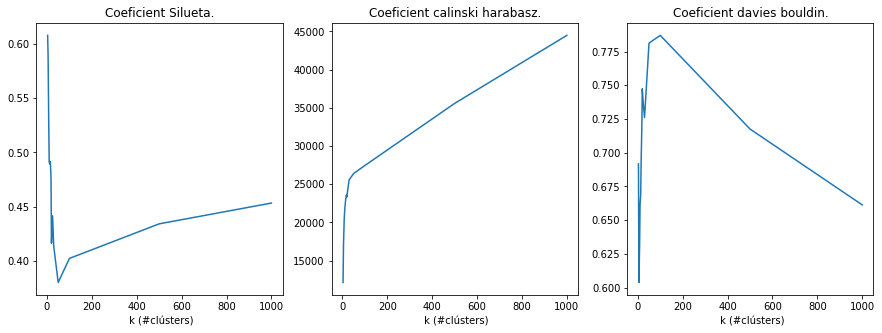


#Qualitat interna dels clústers: 
 Durada=1 minuts 58 segons.


In [36]:
time_start0 = time.time()
lscores = []
llista_clusters = [3,5,8,10,13,15,18,20,25,30,50,100,500,1000]
for nc in llista_clusters:
    time_start=time.time()
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(X_PCA)
    lscores.append((
        silhouette_score(X_PCA, labels),
        calinski_harabasz_score(X_PCA, labels),
        davies_bouldin_score(X_PCA, labels)))
    temps=(time.time()-time_start)/60
    print("Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.\n \
    per k={} Durada={} minuts {} segons.".format(nc, int(temps) if temps>0 else 0, \
                                                 int((temps-int(temps))*60)))
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(llista_clusters, [x for x,_,_ in lscores])
ax[0].set_title("Coeficient Silueta.")
ax[0].set_xlabel(" k (#clústers)")
ax[1].plot(llista_clusters, [x for _, x,_ in lscores])
ax[1].set_title("Coeficient calinski harabasz.")
ax[1].set_xlabel(" k (#clústers)")
ax[2].plot(llista_clusters, [x for _, _, x in lscores])
ax[2].set_title("Coeficient davies bouldin.")
ax[2].set_xlabel(" k (#clústers)")
plt.show()
temps=(time.time()-time_start0)/60
print("\n#Qualitat interna dels clústers: \n Durada={} minuts {} segons." \
      .format(int(temps) if temps>0 else 0, int((temps-int(temps))*60)))

### Sobre la matriu tf-idf

Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=3 Durada=0 minuts 20 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=5 Durada=0 minuts 17 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=8 Durada=0 minuts 18 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=10 Durada=0 minuts 25 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=13 Durada=0 minuts 19 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=15 Durada=0 minuts 22 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=18 Durada=0 minuts 22 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=20 Durada=0 minuts 24 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=25 Durada=0 minuts 27 segons.
Calculats coeficients silueta, 

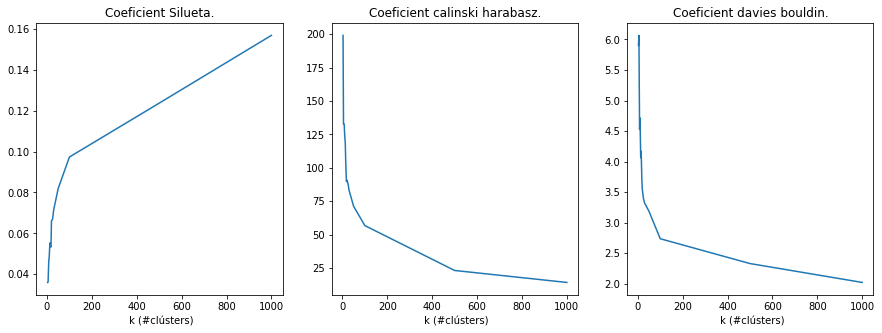


#Qualitat interna dels clústers: 
 Durada=6 minuts 56 segons.


In [37]:
time_start0 = time.time()
lscores = []
llista_clusters = [3,5,8,10,13,15,18,20,25,30,50,100,500,1000]
for nc in llista_clusters:
    time_start=time.time()
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(matriu_tfidf)
    lscores.append((
        silhouette_score(matriu_tfidf, labels),
        calinski_harabasz_score(matriu_tfidf, labels),
        davies_bouldin_score(matriu_tfidf, labels)))
    temps=(time.time()-time_start)/60
    print("Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.\n \
    per k={} Durada={} minuts {} segons.".format(nc, int(temps) if temps>0 else 0, \
                                                 int((temps-int(temps))*60)))
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(llista_clusters, [x for x,_,_ in lscores])
ax[0].set_title("Coeficient Silueta.")
ax[0].set_xlabel(" k (#clústers)")
ax[1].plot(llista_clusters, [x for _, x,_ in lscores])
ax[1].set_title("Coeficient calinski harabasz.")
ax[1].set_xlabel(" k (#clústers)")
ax[2].plot(llista_clusters, [x for _, _, x in lscores])
ax[2].set_title("Coeficient davies bouldin.")
ax[2].set_xlabel(" k (#clústers)")
plt.show()
temps=(time.time()-time_start0)/60
print("\n#Qualitat interna dels clústers: \n Durada={} minuts {} segons." \
      .format(int(temps) if temps>0 else 0, int((temps-int(temps))*60)))

### Index Hartigan, Xu i ZCF

Calculats índexos Hartigan, Xu i ZCF.
     per k=3 Durada=0 minuts 0 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=5 Durada=0 minuts 0 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=8 Durada=0 minuts 0 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=10 Durada=0 minuts 0 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=13 Durada=0 minuts 0 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=15 Durada=0 minuts 1 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=18 Durada=0 minuts 1 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=20 Durada=0 minuts 1 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=25 Durada=0 minuts 1 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=30 Durada=0 minuts 2 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=50 Durada=0 minuts 3 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=100 Durada=0 minuts 6 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=500 Durada=0 minu

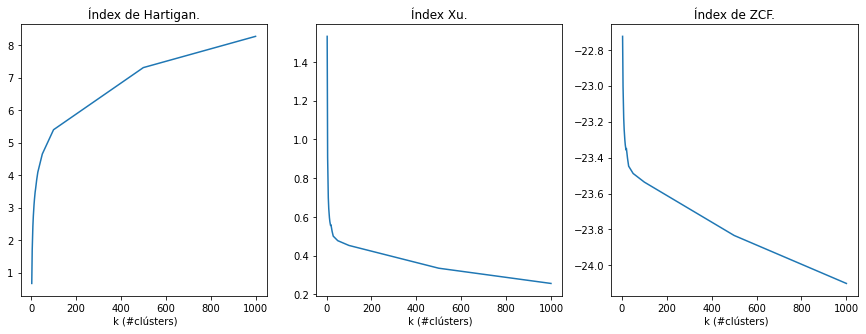


#Qualitat interna dels clústers: 
 Durada=1 minuts 28 segons.


In [41]:
from amltlearn.metrics import  scatter_matrices_scores

time_start0 = time.time()
lscores = []
llista_clusters = [3,5,8,10,13,15,18,20,25,30,50,100,500,1000]
for nc in llista_clusters:
    time_start=time.time()
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(X_PCA)
    lscores.append(scatter_matrices_scores(X_PCA, labels, indices= ['Hartigan', 'Xu', 'ZCF']))
    
    temps=(time.time()-time_start)/60
    print("Calculats índexos Hartigan, Xu i ZCF.\n \
    per k={} Durada={} minuts {} segons.".format(nc, int(temps) if temps>0 else 0, \
                                                 int((temps-int(temps))*60)))
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(llista_clusters, [x['Hartigan'] for x in lscores])
ax[0].set_title("Índex de Hartigan.")
ax[0].set_xlabel(" k (#clústers)")
ax[1].plot(llista_clusters, [x['ZCF'] for x in lscores])
ax[1].set_title("Índex Xu.")
ax[1].set_xlabel(" k (#clústers)")
ax[2].plot(llista_clusters,[x['Xu'] for x in lscores])
ax[2].set_title("Índex de ZCF.")
ax[2].set_xlabel(" k (#clústers)")
plt.show()
temps=(time.time()-time_start0)/60
print("\n#Qualitat interna dels clústers: \n Durada={} minuts {} segons." \
      .format(int(temps) if temps>0 else 0, int((temps-int(temps))*60)))

Calculats índexos Hartigan, Xu i ZCF.
     per k=3 Durada=0 minuts 0 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=5 Durada=0 minuts 0 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=8 Durada=0 minuts 0 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=10 Durada=0 minuts 0 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=13 Durada=0 minuts 0 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=15 Durada=0 minuts 1 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=18 Durada=0 minuts 1 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=20 Durada=0 minuts 1 segons.


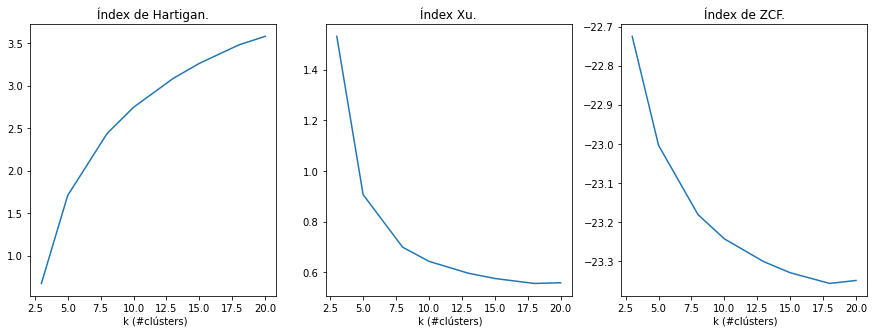


#Qualitat interna dels clústers: 
 Durada=0 minuts 6 segons.


In [42]:
from amltlearn.metrics import  scatter_matrices_scores

time_start0 = time.time()
lscores = []
llista_clusters = [3,5,8,10,13,15,18,20]
for nc in llista_clusters:
    time_start=time.time()
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(X_PCA)
    lscores.append(scatter_matrices_scores(X_PCA, labels, indices= ['Hartigan', 'Xu', 'ZCF']))
    
    temps=(time.time()-time_start)/60
    print("Calculats índexos Hartigan, Xu i ZCF.\n \
    per k={} Durada={} minuts {} segons.".format(nc, int(temps) if temps>0 else 0, \
                                                 int((temps-int(temps))*60)))
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(llista_clusters, [x['Hartigan'] for x in lscores])
ax[0].set_title("Índex de Hartigan.")
ax[0].set_xlabel(" k (#clústers)")
ax[1].plot(llista_clusters, [x['ZCF'] for x in lscores])
ax[1].set_title("Índex Xu.")
ax[1].set_xlabel(" k (#clústers)")
ax[2].plot(llista_clusters,[x['Xu'] for x in lscores])
ax[2].set_title("Índex de ZCF.")
ax[2].set_xlabel(" k (#clústers)")
plt.show()
temps=(time.time()-time_start0)/60
print("\n#Qualitat interna dels clústers: \n Durada={} minuts {} segons." \
      .format(int(temps) if temps>0 else 0, int((temps-int(temps))*60)))

Calculats índexos Hartigan, Xu i ZCF.
     per k=3 Durada=0 minuts 17 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=5 Durada=0 minuts 14 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=8 Durada=0 minuts 16 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=10 Durada=0 minuts 21 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=13 Durada=0 minuts 16 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=15 Durada=0 minuts 19 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=18 Durada=0 minuts 18 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=20 Durada=0 minuts 22 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=25 Durada=0 minuts 23 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=30 Durada=0 minuts 30 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=50 Durada=0 minuts 39 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=100 Durada=0 minuts 29 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=500 D

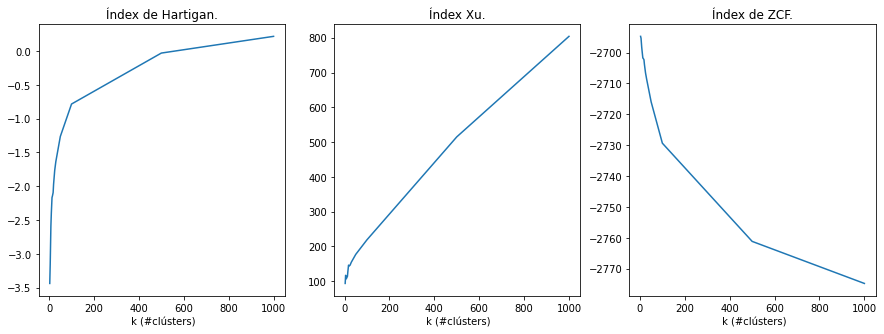


#Qualitat interna dels clústers: 
 Durada=6 minuts 9 segons.


In [44]:
from amltlearn.metrics import  scatter_matrices_scores

time_start0 = time.time()
lscores = []
llista_clusters = [3,5,8,10,13,15,18,20,25,30,50,100,500,1000]
for nc in llista_clusters:
    time_start=time.time()
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(matriu_tfidf)
    lscores.append(scatter_matrices_scores(matriu_tfidf, labels, indices= ['Hartigan', 'Xu', 'ZCF']))
    
    temps=(time.time()-time_start)/60
    print("Calculats índexos Hartigan, Xu i ZCF.\n \
    per k={} Durada={} minuts {} segons.".format(nc, int(temps) if temps>0 else 0, \
                                                 int((temps-int(temps))*60)))
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(llista_clusters, [x['Hartigan'] for x in lscores])
ax[0].set_title("Índex de Hartigan.")
ax[0].set_xlabel(" k (#clústers)")
ax[1].plot(llista_clusters, [x['ZCF'] for x in lscores])
ax[1].set_title("Índex Xu.")
ax[1].set_xlabel(" k (#clústers)")
ax[2].plot(llista_clusters,[x['Xu'] for x in lscores])
ax[2].set_title("Índex de ZCF.")
ax[2].set_xlabel(" k (#clústers)")
plt.show()
temps=(time.time()-time_start0)/60
print("\n#Qualitat interna dels clústers: \n Durada={} minuts {} segons." \
      .format(int(temps) if temps>0 else 0, int((temps-int(temps))*60)))

Calculats índexos Hartigan, Xu i ZCF.
     per k=3 Durada=0 minuts 17 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=5 Durada=0 minuts 13 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=8 Durada=0 minuts 15 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=10 Durada=0 minuts 22 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=13 Durada=0 minuts 19 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=15 Durada=0 minuts 19 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=18 Durada=0 minuts 19 segons.
Calculats índexos Hartigan, Xu i ZCF.
     per k=20 Durada=0 minuts 24 segons.


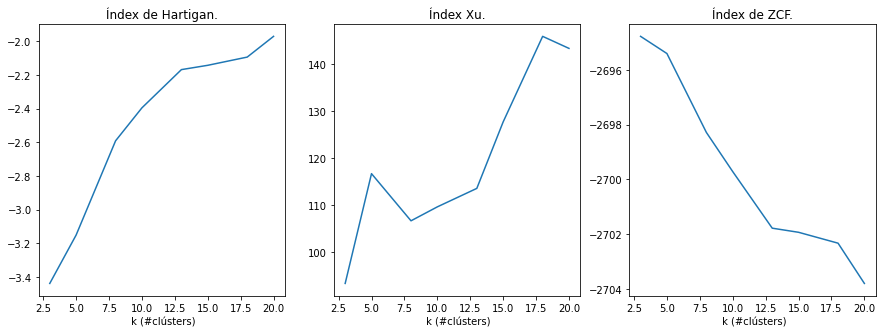


#Qualitat interna dels clústers: 
 Durada=2 minuts 32 segons.


In [45]:
from amltlearn.metrics import  scatter_matrices_scores

time_start0 = time.time()
lscores = []
llista_clusters = [3,5,8,10,13,15,18,20]
for nc in llista_clusters:
    time_start=time.time()
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(matriu_tfidf)
    lscores.append(scatter_matrices_scores(matriu_tfidf, labels, indices= ['Hartigan', 'Xu', 'ZCF']))
    
    temps=(time.time()-time_start)/60
    print("Calculats índexos Hartigan, Xu i ZCF.\n \
    per k={} Durada={} minuts {} segons.".format(nc, int(temps) if temps>0 else 0, \
                                                 int((temps-int(temps))*60)))
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(llista_clusters, [x['Hartigan'] for x in lscores])
ax[0].set_title("Índex de Hartigan.")
ax[0].set_xlabel(" k (#clústers)")
ax[1].plot(llista_clusters, [x['ZCF'] for x in lscores])
ax[1].set_title("Índex Xu.")
ax[1].set_xlabel(" k (#clústers)")
ax[2].plot(llista_clusters,[x['Xu'] for x in lscores])
ax[2].set_title("Índex de ZCF.")
ax[2].set_xlabel(" k (#clústers)")
plt.show()
temps=(time.time()-time_start0)/60
print("\n#Qualitat interna dels clústers: \n Durada={} minuts {} segons." \
      .format(int(temps) if temps>0 else 0, int((temps-int(temps))*60)))

In [15]:
# Visualitzacio amb PCA
Xz = matriu_tfidf
pca3=delayedsparse.PCA(n_components=3)
X_PCA3 = pca3.fit(Xz).transform(Xz)

In [16]:
num_clusters=15
km = KMeans(num_clusters, n_init=10, random_state=88)
labels = km.fit_predict(X_PCA3)
model=km
colors = np.array(list(islice(cycle(['dodgerblue', 'red', 'forestgreen',
                                     'lime', 'brown', 'mediumorchid',
                                     'darkgrey', 'teal', 'black',
                                     'blue','yellowgreen','hotpink','y',
                                     'magenta','aquamarine','khaki',
                                     'orange','skyblue','yellow']),
                                      int(len(set(model.labels_))))))

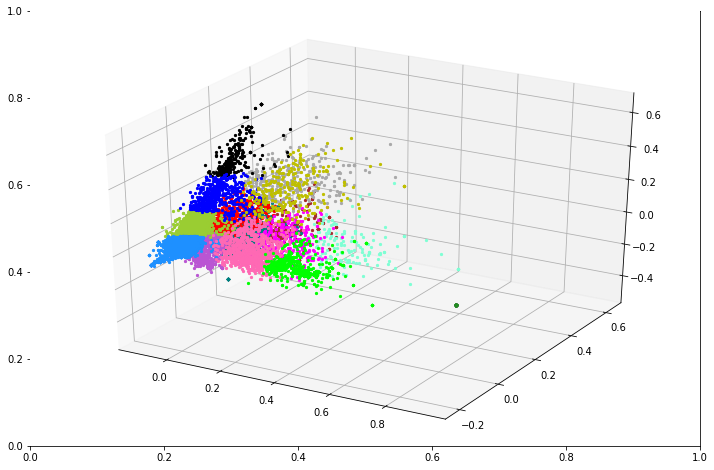

In [17]:
model=km
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=num_clusters-1)
for idcluster in range(0,num_clusters):  
    ax.scatter(np.array(X_PCA3[:,0][model.labels_==idcluster]), \
               np.array(X_PCA3[:,1][model.labels_==idcluster]), \
               np.array(X_PCA3[:,2][model.labels_==idcluster]), \
               c=colors[idcluster], norm=norm, cmap=cmap, s=5, \
               depthshade=False, label="Cluster "+str(idcluster) + \
               "   ("+ str(np.bincount(model.labels_)[idcluster]) + ")")
plt.show()

In [36]:
lscores = []
llista_clusters = [3,5,8,10,13,15,18,20,25,30,50,100,500,1000]
for nc in llista_clusters:
    time_start=time.time()
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(X_PCA)
    lscores.append(silhouette_score(X_PCA, labels))
    #lscores.append(silhouette_score(X_PCA, labels))
        #silhouette_score(X_PCA, labels),
        #calinski_harabasz_score(X_PCA, labels),
        #davies_bouldin_score(X_PCA, labels)))
    temps=(time.time()-time_start)/60
    print("Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.\n \
    per k={} Durada={} minuts {} segons.".format(nc, int(temps) if temps>0 else 0, \
                                                 int((temps-int(temps))*60)))


Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=3 Durada=0 minuts 2 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=5 Durada=0 minuts 2 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=8 Durada=0 minuts 2 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=10 Durada=0 minuts 2 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=13 Durada=0 minuts 3 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=15 Durada=0 minuts 3 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=18 Durada=0 minuts 3 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=20 Durada=0 minuts 3 segons.
Calculats coeficients silueta, calinski_harasbaz i davies_bouldin.
     per k=25 Durada=0 minuts 3 segons.
Calculats coeficients silueta, calinski_

In [39]:
lscores

[0.6075456976997797,
 0.5890177003091596,
 0.5240910257475299,
 0.4907253581386901,
 0.4892671747945955,
 0.49131576440918084,
 0.476609634240365,
 0.41642768246829187,
 0.44160603880726834,
 0.41372408574733666,
 0.3803205923839969,
 0.4024152410662754,
 0.4342159533183692,
 0.4533225383376763]

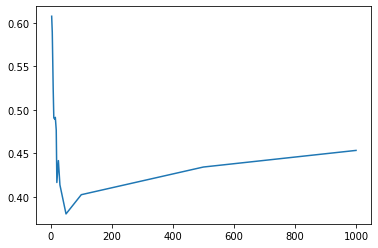

In [38]:
plt.plot(llista_clusters,lscores)

In [ ]:
time_start0 = time.time()
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(llista_clusters, [x for x,_,_ in lscores])
ax[0].set_title("Coeficient Silueta.")
ax[0].set_xlabel(" k (#clústers)")
#ax[1].plot(llista_clusters, [x for _, x,_ in lscores])
#ax[1].set_title("Coeficient calinski harabasz.")
#ax[1].set_xlabel(" k (#clústers)")
#ax[2].plot(llista_clusters, [x for _, _, x in lscores])
#ax[2].set_title("Coeficient davies bouldin.")
#ax[2].set_xlabel(" k (#clústers)")
plt.show()
temps=(time.time()-time_start0)/60
print("\n#Qualitat interna dels clústers: \n Durada={} minuts {} segons." \
      .format(int(temps) if temps>0 else 0, int((temps-int(temps))*60)))